In [1]:
!pip install umap-learn

In [2]:
from sklearn.decomposition import PCA,KernelPCA, NMF, IncrementalPCA,SparsePCA,TruncatedSVD,FastICA
#import umap.umap_ as umap
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
#from tsfresh import extract_features
#from tsfresh.feature_extraction import MinimalFCParameters
#import umap
import pandas as pd
import numpy as np
# import yfinance as yf
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
data_train=pd.read_csv('/content/drive/MyDrive/Dataset/Rida/ItalyPowerDemand/ItalyPowerDemand_TRAIN.tsv',sep='\t')
data_test=pd.read_csv('/content/drive/MyDrive/Dataset/Rida/ItalyPowerDemand/ItalyPowerDemand_TEST.tsv',sep='\t')

In [4]:
data_train.head()

,1,-0.71051757,-1.1833204,-1.3724416,-1.5930829,-1.4670021,-1.3724416.1,-1.0887599,0.045966947,0.92853223,...,-0.6474772,-0.26923494,-0.20619456,0.61333034.1,1.3698149,1.4643754,1.054613,0.58181015,0.1720477,-0.26923494.1
0,1,-0.993009,-1.426786,-1.579884,-1.605401,-1.630917,-1.375754,-1.018526,-0.355102,0.716583,...,0.486936,0.563485,0.614518,0.308322,0.257289,1.099327,1.048295,0.691066,-0.048906,-0.380618
1,2,1.319067,0.569774,0.195128,-0.085856,-0.179518,-0.273180,-0.085856,-1.397118,-1.116134,...,-0.554164,-0.741487,-0.741487,-0.741487,-1.116134,-0.460503,0.476113,2.349344,2.255682,1.600052
2,2,-0.812444,-1.157553,-1.416385,-1.531421,-1.502662,-1.416385,-1.646458,-0.467335,0.654269,...,0.740547,0.884342,0.884342,0.683028,0.625510,0.424197,-0.007190,-0.035949,0.107847,-0.266022
3,1,-0.972840,-1.390518,-1.536705,-1.620240,-1.620240,-1.453169,-0.993724,0.050469,0.635218,...,0.321960,0.489031,0.614334,1.303502,1.240850,1.073779,0.551682,0.426379,-0.179253,-0.638698
4,1,0.367424,-0.277808,-0.761732,-0.869271,-1.138118,-1.084348,-1.138118,-0.600424,-1.084348,...,-0.277808,-0.385347,-0.600424,-0.546655,-0.492886,0.367424,2.303120,2.088043,1.765427,1.173964


In [5]:
X_train=data_train.iloc[:,1:]
y_train=data_train.iloc[:,0]
X_test=data_test.iloc[:,1:]
y_test=data_test.iloc[:,0]

In [8]:
X_train.shape

(66, 24)

In [6]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)

kernel_pca = KernelPCA(n_components=n_components, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
X_kpca = kernel_pca.fit_transform(X_train)

ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X_train)

spca = SparsePCA(n_components=n_components, random_state=0)
X_spca = spca.fit_transform(X_train)

svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X_train)

ica = FastICA(n_components=n_components,random_state=0,whiten='unit-variance')
X_ica = ica.fit_transform(X_train)

#nmf = NMF(n_components=n_components, init='random', random_state=0)
#X_nmf = nmf.fit_transform(X_train)

umap1 = UMAP(n_neighbors=n_components, min_dist=0.3, random_state=42)
X_umap = umap1.fit_transform(X_train)

tsne = TSNE(n_components=n_components, random_state=42)
X_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


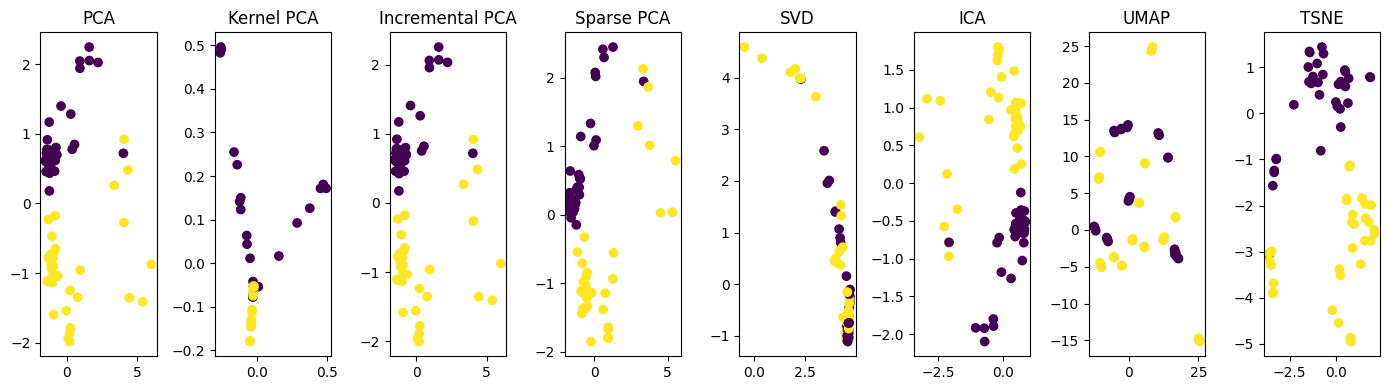

In [7]:
#fig, (pca_ax, kpca_ax, ipca_ax, spca_ax, svd_ax, ica_ax, umap_ax, tsne_ax ) = plt.subplots( nrows=2, ncols=4, figsize=(14, 4))
fig, (pca_ax, kpca_ax, ipca_ax, spca_ax, svd_ax, ica_ax, umap_ax, tsne_ax ) = plt.subplots( nrows=1, ncols=8, figsize=(14, 4))

pca_ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
#pca_ax.set_ylabel("Principal component #1")
#pca_ax.set_xlabel("Principal component #0")
pca_ax.set_title("PCA")

kpca_ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='viridis')
#kpca_ax.set_ylabel("Principal component #1")
#kpca_ax.set_xlabel("Principal component #0")
kpca_ax.set_title("Kernel PCA")

ipca_ax.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y_train, cmap='viridis')
#ipca_ax.set_ylabel("Principal component #1")
#ipca_ax.set_xlabel("Principal component #0")
ipca_ax.set_title("Incremental PCA")

spca_ax.scatter(X_spca[:, 0], X_spca[:, 1], c=y_train, cmap='viridis')
#spca_ax.set_ylabel("Principal component #1")
#spca_ax.set_xlabel("Principal component #0")
spca_ax.set_title("Sparse PCA")

svd_ax.scatter(X_svd[:, 0], X_svd[:, 1], c=y_train, cmap='viridis')
#svd_ax.set_ylabel("Component #1")
#svd_ax.set_xlabel("Component #0")
svd_ax.set_title("SVD")

ica_ax.scatter(X_ica[:, 0], X_ica[:, 1], c=y_train, cmap='viridis')
#ica_ax.set_ylabel("Component #1")
#ica_ax.set_xlabel("Component #0")
ica_ax.set_title("ICA")

umap_ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='viridis')
#umap_ax.set_ylabel("Component #1")
#umap_ax.set_xlabel("Component #0")
umap_ax.set_title("UMAP")

tsne_ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
#tsne_ax.set_ylabel("Component #1")
#tsne_ax.set_xlabel("Component #0")
tsne_ax.set_title("TSNE")

fig.tight_layout()
plt.show()


In [8]:
n_components = 3
pca = PCA(n_components=n_components)
X_pca3 = pca.fit_transform(X_train)

kernel_pca = KernelPCA(n_components=n_components, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
X_kpca3 = kernel_pca.fit_transform(X_train)

ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca3 = ipca.fit_transform(X_train)

spca = SparsePCA(n_components=n_components, random_state=0)
X_spca3 = spca.fit_transform(X_train)

svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
X_svd3 = svd.fit_transform(X_train)

ica = FastICA(n_components=n_components,random_state=0,whiten='unit-variance')
X_ica3 = ica.fit_transform(X_train)

umap1 = UMAP(n_neighbors=n_components, min_dist=0.3, random_state=42)
X_umap3 = umap1.fit_transform(X_train)

tsne = TSNE(n_components=n_components, random_state=42)
X_tsne3 = tsne.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 960x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

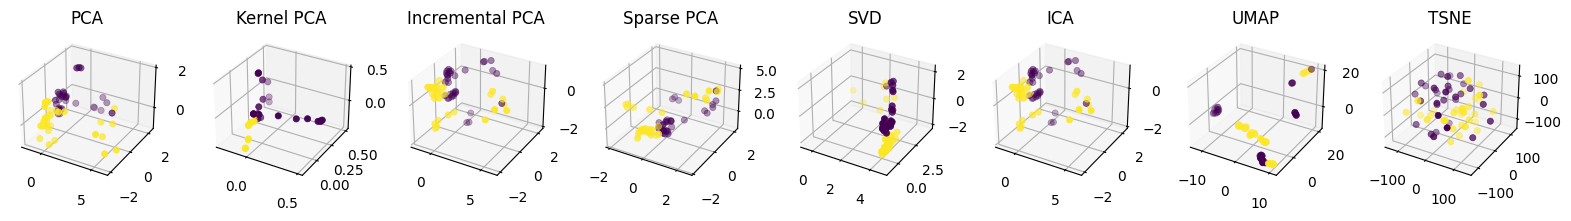

In [9]:
fig = plt.figure(figsize=plt.figaspect(0.5))

fig = plt.figure()

fig, axs = plt.subplots(1, 8, subplot_kw={"projection": "3d"}, figsize=(16, 4))
axs[0].scatter(X_pca3[:,0], X_pca3[:,1],  X_pca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[0].set_title("PCA")
axs[1].scatter(X_kpca3[:,0], X_kpca3[:,1], X_kpca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[1].set_title("Kernel PCA")
axs[2].scatter(X_ipca3[:,0], X_ipca3[:,1], X_ipca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[2].set_title("Incremental PCA")
axs[3].scatter(X_spca3[:,0], X_spca3[:,1], X_spca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[3].set_title("Sparse PCA")
axs[4].scatter(X_svd3[:,0], X_svd3[:,1], X_svd3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[4].set_title("SVD")
axs[5].scatter(X_ipca3[:,0], X_ipca3[:,1], X_ipca3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[5].set_title("ICA")
axs[6].scatter(X_umap3[:,0], X_umap3[:,1], X_umap3[:,1], c=y_train, cmap='viridis', linewidth=0.5)
axs[6].set_title("UMAP")
axs[7].scatter(X_tsne3[:,0], X_tsne3[:,1], X_tsne3[:,2], c=y_train, cmap='viridis', linewidth=0.5)
axs[7].set_title("TSNE")
fig.tight_layout(pad=3.0)
plt.show()

In [10]:
!pip install pycaret

In [11]:
from pycaret.time_series import *


In [12]:
exp_name = setup(data = data_train, target='1',fh = 12)

,Description,Value
0,session_id,2932
1,Target,1
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(66, 25)"
5,Transformed data shape,"(66, 25)"
6,Transformed train set shape,"(54, 25)"
7,Transformed test set shape,"(12, 25)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [13]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.2367,0.2951,0.1349,0.2238,0.0821,0.0960,0.6721,1.1033
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2481,0.3022,0.1422,0.2293,0.0859,0.1003,0.6585,0.9000
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.2499,0.2993,0.1425,0.2268,0.0870,0.1017,0.6616,0.5233
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.2652,0.2783,0.1568,0.2144,0.1062,0.1107,0.7860,0.9200
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2784,0.3568,0.1616,0.2734,0.1039,0.1149,0.6315,0.5900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.3001,0.3275,0.1759,0.2507,0.1179,0.1266,0.6882,0.8433
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.3072,0.3407,0.1805,0.2618,0.1184,0.1270,0.6713,1.3500
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.3344,0.3198,0.1963,0.2450,0.1346,0.1483,0.6875,0.4967
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.3369,0.3195,0.1978,0.2448,0.1354,0.1479,0.6885,0.5100
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.3701,0.3339,0.2154,0.2550,0.1488,0.1648,0.6485,0.8000


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [14]:
arima = create_model("arima")
#plot_model(model1)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,17.0000,0.4167,0.3671,0.2696,0.2953,0.2318,0.2487,0.5349
1,29.0000,0.8004,0.7338,0.4416,0.5450,0.2747,0.2693,-0.2222
2,41.0000,0.5212,0.5589,0.3178,0.4365,0.2015,0.2111,0.1428
Mean,nan,0.5794,0.5533,0.3430,0.4256,0.2360,0.2430,0.1518
SD,nan,0.1620,0.1497,0.0724,0.1022,0.0301,0.0241,0.3092


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

In [18]:
naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})

ValueError: Estimator naive not available. Please see docstring for list of available estimators.

In [19]:
lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,17.0000,0.7500,0.6041,0.4853,0.4860,0.4191,0.3620,-0.2595
1,29.0000,0.9800,0.8247,0.5407,0.6126,0.3123,0.3603,-0.5440
2,41.0000,0.8201,0.6405,0.5001,0.5001,0.3342,0.3238,-0.1257
Mean,nan,0.8500,0.6898,0.5087,0.5329,0.3552,0.3487,-0.3097
SD,nan,0.0963,0.0966,0.0234,0.0566,0.0461,0.0176,0.1744


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,17.0000,0.0783,0.1737,0.0507,0.1397,0.0503,0.0423,0.8959
1,29.0000,0.4747,0.5137,0.2619,0.3816,0.1632,0.1922,0.4010
2,41.0000,0.2823,0.3830,0.1721,0.2991,0.0982,0.1102,0.5975
Mean,nan,0.2784,0.3568,0.1616,0.2734,0.1039,0.1149,0.6315
SD,nan,0.1618,0.1400,0.0866,0.1004,0.0463,0.0613,0.2035


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,17.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,29.0000,0.4881,0.5286,0.2693,0.3927,0.1677,0.1983,0.3657
2,41.0000,0.2222,0.3568,0.1355,0.2786,0.0785,0.0896,0.6506
Mean,nan,0.2367,0.2951,0.1349,0.2238,0.0821,0.0960,0.6721
SD,nan,0.1995,0.2202,0.1099,0.1649,0.0685,0.0811,0.2594


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,17.0000,0.1816,0.1879,0.1175,0.1511,0.1033,0.0955,0.8782
1,29.0000,0.4676,0.4505,0.2580,0.3346,0.1581,0.1788,0.5393
2,41.0000,0.2725,0.3836,0.1661,0.2995,0.0938,0.1066,0.5963
Mean,nan,0.3072,0.3407,0.1805,0.2618,0.1184,0.1270,0.6713
SD,nan,0.1193,0.1114,0.0583,0.0795,0.0283,0.0370,0.1482


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,17.0000,0.2061,0.2270,0.1333,0.1826,0.1083,0.1030,0.8222
1,29.0000,0.3858,0.3648,0.2128,0.2710,0.1382,0.1530,0.6979
2,41.0000,0.2036,0.2430,0.1242,0.1898,0.0722,0.0760,0.8380
Mean,nan,0.2652,0.2783,0.1568,0.2144,0.1062,0.1107,0.7860
SD,nan,0.0853,0.0616,0.0398,0.0401,0.0270,0.0319,0.0627


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
exp_name = setup(data = pd.Series(X_pca.reshape(-1)),fh = 12)

,Description,Value
0,session_id,2314
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(132, 1)"
5,Transformed data shape,"(132, 1)"
6,Transformed train set shape,"(120, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [25]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7918,0.8121,1.2610,1.6367,1.0112,1.5804,-0.0417,0.6700
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7966,0.8237,1.2698,1.6600,1.0556,1.5028,-0.0938,0.3033
theta,Theta Forecaster,0.8022,0.8014,1.2782,1.6153,1.0176,1.8544,-0.0338,0.0500
polytrend,Polynomial Trend Forecaster,0.8025,0.8024,1.2787,1.6173,1.0198,1.8482,-0.0360,0.0333
exp_smooth,Exponential Smoothing,0.8025,0.8024,1.2787,1.6173,1.0198,1.8482,-0.0360,0.0633
ets,ETS,0.8025,0.8024,1.2787,1.6173,1.0198,1.8482,-0.0360,0.0867
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8028,0.8017,1.2791,1.6159,1.0182,1.8648,-0.0345,0.8767
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8028,0.8017,1.2791,1.6159,1.0182,1.8648,-0.0345,0.3067
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8028,0.8017,1.2791,1.6159,1.0182,1.8648,-0.0345,0.3000
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8028,0.8017,1.2792,1.6160,1.0183,1.8649,-0.0346,0.3000


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [26]:
arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9074,0.9276,1.4234,1.8336,1.0166,1.9347,-0.0407
1,95.0000,0.5069,0.4497,0.8390,0.9410,0.9894,1.9406,0.0005
2,107.0000,1.0029,1.0039,1.5886,2.0258,1.0114,1.9932,-0.0082
Mean,nan,0.8057,0.7937,1.2837,1.6001,1.0058,1.9561,-0.0161
SD,nan,0.2149,0.2452,0.3216,0.4726,0.0118,0.0263,0.0177


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.8094,0.9128,3.8612,4.9884,2.2144,1.1868,-0.6950
1,171.0000,0.7340,0.7575,3.5869,4.2217,0.9446,1.4756,-0.0833
2,183.0000,1.6329,1.4944,8.0160,8.3494,5.0029,1.7976,-11.7736
Mean,nan,1.0588,1.0549,5.1547,5.8532,2.7206,1.4867,-4.1840
SD,nan,0.4071,0.3172,2.0263,1.7927,1.6950,0.2495,5.3725


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9054,0.9526,1.4204,1.8831,1.0631,1.6433,-0.0977
1,95.0000,0.5086,0.4499,0.8419,0.9414,0.9992,1.9938,-0.0002
2,107.0000,0.9943,1.0026,1.5750,2.0232,0.9922,1.9574,-0.0056
Mean,nan,0.8028,0.8017,1.2791,1.6159,1.0182,1.8648,-0.0345
SD,nan,0.2112,0.2496,0.3156,0.4804,0.0319,0.1573,0.0447


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.2823,1.3670,2.0116,2.7022,1.5873,1.7337,-1.2602
1,95.0000,0.8964,0.9148,1.4839,1.9143,1.9124,1.4297,-3.1363
2,107.0000,1.4089,1.4320,2.2318,2.8897,1.9364,1.3481,-1.0514
Mean,nan,1.1959,1.2379,1.9091,2.5021,1.8120,1.5039,-1.8160
SD,nan,0.2180,0.2300,0.3138,0.4226,0.1592,0.1659,0.9375


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9066,0.9823,1.4221,1.9417,1.1073,1.4524,-0.1671
1,95.0000,0.8450,0.7728,1.3988,1.6171,2.0302,1.7306,-1.9517
2,107.0000,0.9924,1.0093,1.5720,2.0366,0.9707,1.8228,-0.0190
Mean,nan,0.9146,0.9214,1.4643,1.8652,1.3694,1.6686,-0.7126
SD,nan,0.0604,0.1057,0.0767,0.1796,0.4706,0.1574,0.8783


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9759,1.0789,1.5309,2.1327,1.1956,1.3218,-0.4079
1,95.0000,0.7669,0.7148,1.2696,1.4957,2.3330,1.3878,-1.5251
2,107.0000,1.1752,1.1787,1.8616,2.3786,2.0178,1.3545,-0.3899
Mean,nan,0.9727,0.9908,1.5540,2.0023,1.8488,1.3547,-0.7743
SD,nan,0.1667,0.1994,0.2422,0.3721,0.4795,0.0270,0.5309


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.8441,0.9005,1.3241,1.7800,1.1050,1.4704,0.0193
1,95.0000,0.6759,0.6976,1.1188,1.4598,1.6345,1.1487,-1.4054
2,107.0000,1.0639,0.9899,1.6852,1.9975,1.2559,1.4663,0.0198
Mean,nan,0.8613,0.8626,1.3761,1.7458,1.3318,1.3618,-0.4554
SD,nan,0.1589,0.1223,0.2341,0.2208,0.2227,0.1507,0.6717


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
exp_name = setup(data = pd.Series(X_kpca.reshape(-1)),fh = 12)

,Description,Value
0,session_id,6888
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(132, 1)"
5,Transformed data shape,"(132, 1)"
6,Transformed train set shape,"(120, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [38]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,0.3619,0.3582,0.0383,0.0646,0.6131,0.5147,0.0453,0.1167
arima,ARIMA,0.3734,0.3596,0.0395,0.0648,0.6754,0.5826,0.0349,0.1600
naive,Naive Forecaster,0.5114,0.5508,0.0550,0.1006,0.8390,0.6620,-0.1028,1.6800
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.5487,0.4456,0.0583,0.0812,1.2587,0.9836,-0.4954,1.4867
auto_arima,Auto ARIMA,0.5659,0.5091,0.0605,0.0929,0.7799,1.2273,-0.2472,34.7233
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5874,0.4929,0.0632,0.0907,1.5123,0.9991,-1.4455,1.3300
polytrend,Polynomial Trend Forecaster,0.6492,0.5952,0.0709,0.1098,0.9413,1.4310,-0.8894,0.0333
theta,Theta Forecaster,0.6529,0.5951,0.0713,0.1097,0.9534,1.4579,-0.8837,0.0833
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6637,0.5999,0.0721,0.1118,1.8970,0.9446,-3.4062,0.7700
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6733,0.5255,0.0725,0.0960,1.5059,1.2856,-1.1072,0.6100


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [39]:
arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.2866,0.2448,0.0356,0.0492,0.8667,0.7154,-0.2317
1,95.0000,0.1925,0.1836,0.0210,0.0339,0.4727,0.4004,0.9493
2,107.0000,0.6411,0.6504,0.0619,0.1114,0.6868,0.6321,-0.6129
Mean,nan,0.3734,0.3596,0.0395,0.0648,0.6754,0.5826,0.0349
SD,nan,0.1932,0.2071,0.0169,0.0335,0.1610,0.1333,0.6650


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.3421,0.0806,0.0092,0.0095,0.6603,0.4799,-13.6676
1,171.0000,0.1056,0.0321,0.0027,0.0037,0.1545,0.1803,-1.1467
2,183.0000,4.0531,2.1754,0.0970,0.2396,1.4352,0.7691,-0.1786
Mean,nan,1.5003,0.7627,0.0363,0.0843,0.7500,0.4764,-4.9977
SD,nan,1.8077,0.9992,0.0430,0.1098,0.5266,0.2404,6.1433


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.6069,0.4357,0.0754,0.0876,1.5992,2.0000,-2.9016
1,95.0000,0.4521,0.3810,0.0494,0.0703,1.4357,0.7575,0.7816
2,107.0000,0.9610,0.7599,0.0928,0.1302,1.4829,1.0992,-1.2015
Mean,nan,0.6733,0.5255,0.0725,0.0960,1.5059,1.2856,-1.1072
SD,nan,0.2130,0.1672,0.0178,0.0252,0.0687,0.5241,1.5051


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9244,0.8697,0.1149,0.1748,4.0923,1.1600,-14.5453
1,95.0000,0.4453,0.3739,0.0487,0.0690,1.0393,0.8104,0.7896
2,107.0000,1.0180,0.7379,0.0983,0.1264,1.5705,1.5377,-1.0759
Mean,nan,0.7959,0.6605,0.0873,0.1234,2.2340,1.1694,-4.9438
SD,nan,0.2508,0.2096,0.0281,0.0432,1.3318,0.2970,6.8318


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.6418,0.7413,0.0798,0.1490,2.8886,0.9145,-10.2956
1,95.0000,0.4919,0.3925,0.0538,0.0724,1.4881,0.8345,0.7683
2,107.0000,0.8574,0.6660,0.0828,0.1141,1.3142,1.0849,-0.6913
Mean,nan,0.6637,0.5999,0.0721,0.1118,1.8970,0.9446,-3.4062
SD,nan,0.1500,0.1499,0.0130,0.0313,0.7048,0.1044,4.9078


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.5509,0.5108,0.0685,0.1027,2.3251,1.0585,-4.3624
1,95.0000,0.3287,0.2685,0.0359,0.0495,0.9601,0.8530,0.8916
2,107.0000,0.8826,0.6995,0.0852,0.1199,1.2515,1.0857,-0.8655
Mean,nan,0.5874,0.4929,0.0632,0.0907,1.5123,0.9991,-1.4455
SD,nan,0.2276,0.1764,0.0205,0.0299,0.5870,0.1039,2.1838


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.8327,0.5935,0.1035,0.1193,2.6470,1.7977,-6.2407
1,95.0000,0.6125,0.5274,0.0669,0.0973,1.8480,1.1249,0.5815
2,107.0000,0.9269,0.7077,0.0895,0.1213,1.3244,1.2215,-0.9096
Mean,nan,0.7907,0.6096,0.0866,0.1126,1.9398,1.3814,-2.1896
SD,nan,0.1317,0.0745,0.0151,0.0108,0.5438,0.2970,2.9285


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
exp_name = setup(data = pd.Series(X_spca.reshape(-1)),fh = 12)

,Description,Value
0,session_id,6287
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(132, 1)"
5,Transformed data shape,"(132, 1)"
6,Transformed train set shape,"(120, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [47]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8010,0.8935,1.2290,1.6472,1.0950,1.4599,-0.1709,0.3067
grand_means,Grand Means Forecaster,0.8024,0.8421,1.2315,1.5536,1.0009,1.9172,-0.0415,0.0433
ets,ETS,0.8031,0.8705,1.2327,1.6054,1.1655,1.5815,-0.1109,0.0733
theta,Theta Forecaster,0.8038,0.8602,1.2337,1.5862,0.9553,1.7502,-0.0835,0.0500
polytrend,Polynomial Trend Forecaster,0.8043,0.8619,1.2344,1.5893,0.9526,1.7408,-0.0877,0.0333
exp_smooth,Exponential Smoothing,0.8043,0.8619,1.2344,1.5893,0.9526,1.7408,-0.0877,0.0500
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8046,0.8606,1.2349,1.5869,0.9455,1.7166,-0.0845,0.3000
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8046,0.8606,1.2349,1.5869,0.9455,1.7166,-0.0845,0.5467
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8046,0.8606,1.2349,1.5869,0.9455,1.7166,-0.0845,0.3033
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8054,0.8621,1.2360,1.5897,0.9241,1.6642,-0.0872,0.3033


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [48]:
arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9950,0.9890,1.4941,1.7836,0.9876,1.8029,-0.1255
1,95.0000,0.5412,0.5096,0.8510,0.9661,0.9381,1.8069,0.0035
2,107.0000,0.8829,1.0379,1.3674,1.9295,1.0367,1.9887,-0.0204
Mean,nan,0.8064,0.8455,1.2375,1.5597,0.9875,1.8661,-0.0475
SD,nan,0.1930,0.2384,0.2781,0.4240,0.0402,0.0867,0.0560


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.9457,1.0260,4.5340,5.6032,88.5733,1.4247,-1.3540
1,171.0000,0.6935,0.7117,3.3724,3.9240,1.5748,1.3256,-0.0002
2,183.0000,1.7536,1.5945,8.5295,8.8003,8.7882,1.8516,-15.5043
Mean,nan,1.1309,1.1107,5.4786,6.1092,32.9787,1.5340,-5.6195
SD,nan,0.4522,0.3654,2.2088,2.0226,39.4214,0.2282,7.0114


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9900,1.0407,1.4866,1.8769,0.9216,1.4481,-0.2463
1,95.0000,0.5485,0.5109,0.8624,0.9685,1.0000,1.9608,-0.0016
2,107.0000,0.8753,1.0303,1.3556,1.9154,0.9147,1.7409,-0.0055
Mean,nan,0.8046,0.8606,1.2349,1.5869,0.9455,1.7166,-0.0845
SD,nan,0.1871,0.2473,0.2687,0.4375,0.0387,0.2100,0.1145


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.2889,1.2883,1.9353,2.3235,1.5633,1.3590,-0.9101
1,95.0000,1.4131,1.3835,2.2219,2.6229,4.1955,1.6766,-6.3457
2,107.0000,1.1491,1.2415,1.7796,2.3080,4.2877,1.4641,-0.4599
Mean,nan,1.2837,1.3044,1.9789,2.4181,3.3489,1.4999,-2.5719
SD,nan,0.1079,0.0591,0.1832,0.1450,1.2631,0.1321,2.6748


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.0254,1.1578,1.5397,2.0881,0.9409,1.1922,-0.5426
1,95.0000,0.5766,0.5765,0.9066,1.0929,1.2715,1.2990,-0.2753
2,107.0000,0.8473,1.0537,1.3123,1.9589,1.6457,1.4926,-0.0517
Mean,nan,0.8165,0.9293,1.2529,1.7133,1.2860,1.3279,-0.2899
SD,nan,0.1845,0.2531,0.2619,0.4418,0.2879,0.1244,0.2006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.3988,1.3742,2.1004,2.4785,1.7120,1.5816,-1.1733
1,95.0000,0.6757,0.6077,1.0624,1.1521,2.0119,1.3577,-0.4172
2,107.0000,0.8698,1.0427,1.3471,1.9384,2.9876,1.2967,-0.0298
Mean,nan,0.9814,1.0082,1.5033,1.8563,2.2372,1.4120,-0.5401
SD,nan,0.3056,0.3139,0.4379,0.5446,0.5445,0.1225,0.4748


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.0478,1.1805,1.5733,2.1291,1.0158,1.1597,-0.6038
1,95.0000,0.7691,0.7043,1.2093,1.3352,1.9647,1.4695,-0.9034
2,107.0000,0.8325,1.1304,1.2893,2.1015,2.8999,1.0769,-0.2104
Mean,nan,0.8831,1.0051,1.3573,1.8553,1.9601,1.2354,-0.5725
SD,nan,0.1193,0.2137,0.1562,0.3679,0.7692,0.1690,0.2838


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
exp_name = setup(data = pd.Series(X_svd.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,7561
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(132, 1)"
5,Transformed data shape,"(132, 1)"
6,Transformed train set shape,"(120, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8463,0.7171,1.0503,1.3941,0.9724,0.8985,0.5322,0.3267
exp_smooth,Exponential Smoothing,0.8464,0.7181,1.0504,1.3960,0.9742,0.8952,0.5307,0.1833
ets,ETS,0.8464,0.7181,1.0504,1.3960,0.9740,0.8954,0.5307,0.0867
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8493,0.7174,1.0541,1.3947,0.9736,0.8993,0.5320,0.3267
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8493,0.7174,1.0541,1.3947,0.9736,0.8993,0.5320,0.3400
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.8566,0.7414,1.0753,1.4497,1.0017,0.7864,0.5452,0.3167
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8625,0.7326,1.0717,1.4258,0.9855,0.9319,0.5238,0.5133
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.8701,0.7295,1.0808,1.4193,0.9796,0.8989,0.5238,0.5867
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8712,0.7340,1.0828,1.4285,0.9751,0.9290,0.5228,0.5333
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8747,0.7354,1.0873,1.4314,0.9708,0.9288,0.5218,0.3267


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.0978,1.0719,1.3048,2.0460,0.5312,0.6983,0.0466
1,95.0000,2.0988,1.4090,2.7473,2.8603,4.1926,1.0677,-1.1430
2,107.0000,1.1864,0.9667,1.5117,1.8905,1.6963,1.0447,0.3842
Mean,nan,1.4610,1.1492,1.8546,2.2656,2.1400,0.9369,-0.2374
SD,nan,0.4524,0.1887,0.6369,0.4253,1.5274,0.1690,0.6550


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,2.6173,1.9284,3.1109,3.6810,0.9352,1.5685,-2.0860
1,95.0000,1.4415,1.1255,1.8870,2.2849,3.7337,0.8121,-0.3675
2,107.0000,1.9703,1.4105,2.5104,2.7584,1.2204,1.4993,-0.3110
Mean,nan,2.0097,1.4882,2.5027,2.9081,1.9631,1.2933,-0.9215
SD,nan,0.4808,0.3324,0.4997,0.5797,1.2574,0.3414,0.8237


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.1088,0.9264,1.3179,1.7682,0.7052,1.0278,0.2879
1,95.0000,0.3119,0.2541,0.4082,0.5158,0.6252,0.5837,0.9303
2,107.0000,1.1272,0.9716,1.4362,1.9002,1.5904,1.0864,0.3779
Mean,nan,0.8493,0.7174,1.0541,1.3947,0.9736,0.8993,0.5320
SD,nan,0.3801,0.3281,0.4592,0.6238,0.4374,0.2245,0.2840


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.0472,1.0776,1.2447,2.0568,0.4953,0.6675,0.0365
1,95.0000,0.7434,0.5891,0.9732,1.1959,0.9740,0.8933,0.6253
2,107.0000,1.3936,1.1499,1.7757,2.2487,1.7499,1.0965,0.1288
Mean,nan,1.0614,0.9388,1.3312,1.8338,1.0731,0.8858,0.2635
SD,nan,0.2656,0.2490,0.3333,0.4578,0.5169,0.1752,0.2586


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.0966,0.9828,1.3034,1.8760,0.6358,1.0342,0.1985
1,95.0000,0.6173,0.5223,0.8081,1.0603,1.7876,0.5867,0.7055
2,107.0000,1.0999,0.9618,1.4014,1.8809,1.5290,1.0857,0.3904
Mean,nan,0.9379,0.8223,1.1710,1.6057,1.3175,0.9022,0.4315
SD,nan,0.2267,0.2123,0.2597,0.3857,0.4935,0.2241,0.2090


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.1106,0.8990,1.3201,1.7160,0.6873,0.9351,0.3293
1,95.0000,0.5186,0.3756,0.6788,0.7624,1.0524,0.7001,0.8478
2,107.0000,1.2097,1.0942,1.5413,2.1399,1.5569,1.0397,0.2110
Mean,nan,0.9463,0.7896,1.1801,1.5394,1.0989,0.8916,0.4627
SD,nan,0.3051,0.3034,0.3657,0.5761,0.3566,0.1420,0.2765


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.1340,1.0823,1.3478,2.0659,0.5671,0.7620,0.0280
1,95.0000,0.3848,0.3132,0.5037,0.6357,0.5759,0.7929,0.8941
2,107.0000,1.2595,0.9631,1.6047,1.8835,1.5787,1.1287,0.3888
Mean,nan,0.9261,0.7862,1.1521,1.5284,0.9072,0.8945,0.4370
SD,nan,0.3862,0.3380,0.4703,0.6356,0.4749,0.1661,0.3552


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
exp_name = setup(data = pd.Series(X_ipca.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,5729
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(132, 1)"
5,Transformed data shape,"(132, 1)"
6,Transformed train set shape,"(120, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.7544,0.8063,1.1997,1.6226,1.1031,1.1125,-0.0091,0.6167
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7903,0.8131,1.2588,1.6386,1.0090,1.5688,-0.0448,1.1033
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7955,0.8232,1.2682,1.6591,1.0549,1.5007,-0.0932,0.3000
theta,Theta Forecaster,0.8011,0.8011,1.2766,1.6147,1.0160,1.8514,-0.0342,0.0733
polytrend,Polynomial Trend Forecaster,0.8014,0.8020,1.2771,1.6167,1.0181,1.8451,-0.0364,0.0333
exp_smooth,Exponential Smoothing,0.8014,0.8020,1.2771,1.6167,1.0181,1.8451,-0.0364,0.0767
ets,ETS,0.8014,0.8020,1.2771,1.6167,1.0182,1.8451,-0.0364,0.1267
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8017,0.8014,1.2775,1.6153,1.0165,1.8605,-0.0350,0.3033
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8017,0.8014,1.2775,1.6153,1.0165,1.8605,-0.0350,0.3000
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8017,0.8014,1.2775,1.6153,1.0165,1.8605,-0.0350,0.3033


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9073,0.9273,1.4238,1.8336,1.0161,1.9354,-0.0407
1,95.0000,0.5042,0.4485,0.8348,0.9386,0.9887,1.9371,-0.0002
2,107.0000,1.0028,1.0040,1.5883,2.0260,1.0110,1.9936,-0.0083
Mean,nan,0.8048,0.7933,1.2823,1.5994,1.0053,1.9554,-0.0164
SD,nan,0.2161,0.2458,0.3235,0.4738,0.0119,0.0270,0.0175


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9101,1.0662,1.4282,2.1082,1.1970,1.1708,-0.3759
1,95.0000,0.4861,0.4708,0.8048,0.9853,0.8471,1.2831,-0.1022
2,107.0000,1.3276,1.1447,2.1028,2.3099,1.9595,1.5767,-0.3107
Mean,nan,0.9079,0.8939,1.4453,1.8011,1.3345,1.3435,-0.2629
SD,nan,0.3436,0.3009,0.5300,0.5827,0.4645,0.1711,0.1167


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9054,0.9525,1.4208,1.8834,1.0606,1.6430,-0.0980
1,95.0000,0.5059,0.4487,0.8377,0.9389,0.9988,1.9913,-0.0008
2,107.0000,0.9937,1.0029,1.5739,2.0237,0.9902,1.9472,-0.0061
Mean,nan,0.8017,0.8014,1.2775,1.6153,1.0165,1.8605,-0.0350
SD,nan,0.2122,0.2502,0.3172,0.4817,0.0313,0.1548,0.0447


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.7660,0.8232,1.2021,1.6276,0.8133,1.2104,0.1799
1,95.0000,0.9032,0.8847,1.4955,1.8513,2.2049,1.4941,-2.8913
2,107.0000,1.4091,1.4320,2.2319,2.8895,1.9367,1.3479,-1.0510
Mean,nan,1.0261,1.0466,1.6431,2.1228,1.6516,1.3508,-1.2541
SD,nan,0.2766,0.2736,0.4332,0.5498,0.6028,0.1158,1.2620


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9080,0.9803,1.4249,1.9383,1.1028,1.4656,-0.1630
1,95.0000,0.5354,0.5388,0.8865,1.1275,1.2376,1.2205,-0.4433
2,107.0000,1.0076,1.0235,1.5958,2.0653,0.9601,1.7392,-0.0479
Mean,nan,0.8170,0.8475,1.3024,1.7104,1.1002,1.4751,-0.2181
SD,nan,0.2032,0.2190,0.3022,0.4154,0.1133,0.2119,0.1661


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.0182,1.1214,1.5979,2.2172,1.2834,1.3818,-0.5218
1,95.0000,1.0415,0.8795,1.7244,1.8403,2.6357,1.8324,-2.8452
2,107.0000,1.0161,1.1511,1.6094,2.3228,0.9298,1.4148,-0.3254
Mean,nan,1.0253,1.0506,1.6439,2.1268,1.6163,1.5430,-1.2308
SD,nan,0.0115,0.1217,0.0571,0.2071,0.7351,0.2051,1.1444


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.8437,0.9006,1.3241,1.7806,1.1018,1.4686,0.0185
1,95.0000,0.6769,0.7008,1.1208,1.4664,1.6480,1.1482,-1.4414
2,107.0000,1.0294,0.9986,1.6305,2.0150,1.1986,1.6178,0.0026
Mean,nan,0.8500,0.8666,1.3584,1.7540,1.3162,1.4115,-0.4734
SD,nan,0.1440,0.1239,0.2095,0.2247,0.2380,0.1959,0.6845


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
exp_name = setup(data = pd.Series(X_ica.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,2826
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(132, 1)"
5,Transformed data shape,"(132, 1)"
6,Transformed train set shape,"(120, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,0.7556,0.8580,0.8583,1.1408,1.1616,1.2312,-0.2262,0.0300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7637,0.7962,0.8670,1.0583,1.0324,1.6573,-0.0450,0.3067
theta,Theta Forecaster,0.7659,0.7858,0.8694,1.0446,0.9956,1.8904,-0.0191,0.0567
polytrend,Polynomial Trend Forecaster,0.7660,0.7864,0.8696,1.0454,0.9963,1.8882,-0.0206,0.0600
exp_smooth,Exponential Smoothing,0.7660,0.7864,0.8696,1.0454,0.9963,1.8882,-0.0206,0.0533
auto_arima,Auto ARIMA,0.7663,0.7807,0.8698,1.0380,0.9959,1.9824,-0.0068,0.8067
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7663,0.7860,0.8698,1.0449,0.9947,1.8843,-0.0197,0.2933
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7663,0.7860,0.8698,1.0449,0.9947,1.8843,-0.0197,0.4667
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7663,0.7860,0.8698,1.0449,0.9947,1.8843,-0.0197,0.4933
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.7665,0.7861,0.8701,1.0450,0.9952,1.8844,-0.0200,0.5367


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.8407,0.8348,0.9410,1.0908,1.0140,1.9921,-0.0233
1,95.0000,0.5590,0.5761,0.6495,0.7831,0.9626,1.8293,-0.0017
2,107.0000,0.9133,0.9362,1.0349,1.2466,1.0215,1.9834,-0.0068
Mean,nan,0.7710,0.7824,0.8751,1.0402,0.9994,1.9349,-0.0106
SD,nan,0.1528,0.1516,0.1641,0.1926,0.0262,0.0747,0.0092


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9176,1.0754,1.0271,1.4053,1.1876,1.1375,-0.6983
1,95.0000,0.5866,0.6377,0.6814,0.8668,1.2017,1.2616,-0.2272
2,107.0000,1.3629,1.2603,1.5444,1.6780,2.1748,1.5165,-0.8245
Mean,nan,0.9557,0.9911,1.0843,1.3167,1.5214,1.3052,-0.5833
SD,nan,0.3181,0.2611,0.3546,0.3371,0.4621,0.1578,0.2570


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.8364,0.8474,0.9362,1.1074,1.0038,1.7630,-0.0546
1,95.0000,0.5623,0.5760,0.6533,0.7830,0.9895,1.9418,-0.0015
2,107.0000,0.9001,0.9345,1.0199,1.2443,0.9907,1.9482,-0.0031
Mean,nan,0.7663,0.7860,0.8698,1.0449,0.9947,1.8843,-0.0197
SD,nan,0.1465,0.1527,0.1569,0.1934,0.0065,0.0859,0.0247


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9549,1.1078,1.0688,1.4476,1.2118,1.1993,-0.8022
1,95.0000,0.7841,0.8278,0.9109,1.1252,2.2850,1.3230,-1.0680
2,107.0000,0.8366,1.0556,0.9480,1.4054,0.8735,1.0004,-0.2798
Mean,nan,0.8585,0.9970,0.9759,1.3261,1.4568,1.1742,-0.7167
SD,nan,0.0714,0.1216,0.0674,0.1431,0.6017,0.1329,0.3274


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.8388,0.8887,0.9390,1.1613,1.0130,1.4538,-0.1598
1,95.0000,0.5982,0.5893,0.6949,0.8010,1.3020,1.7010,-0.0481
2,107.0000,0.9348,0.9884,1.0593,1.3160,1.1092,1.5503,-0.1222
Mean,nan,0.7906,0.8221,0.8977,1.0928,1.1414,1.5683,-0.1100
SD,nan,0.1416,0.1696,0.1516,0.2158,0.1202,0.1017,0.0464


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9156,1.0049,1.0249,1.3132,1.0984,1.1975,-0.4830
1,95.0000,0.9114,0.9707,1.0588,1.3195,3.2677,1.3861,-1.8437
2,107.0000,0.8130,0.9378,0.9213,1.2486,0.8399,1.1553,-0.0101
Mean,nan,0.8800,0.9711,1.0017,1.2937,1.7353,1.2463,-0.7789
SD,nan,0.0474,0.0274,0.0585,0.0320,1.0887,0.1003,0.7773


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.8777,0.8342,0.9824,1.0901,1.1836,1.7225,-0.0219
1,95.0000,0.7123,0.7710,0.8275,1.0481,1.7120,1.2774,-0.7943
2,107.0000,1.0216,1.1415,1.1577,1.5199,1.0232,1.4692,-0.4967
Mean,nan,0.8705,0.9156,0.9892,1.2194,1.3063,1.4897,-0.4376
SD,nan,0.1264,0.1618,0.1349,0.2132,0.2943,0.1823,0.3181


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
exp_name = setup(data = pd.Series(X_tsne.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,6781
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(132, 1)"
5,Transformed data shape,"(132, 1)"
6,Transformed train set shape,"(120, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.7325,0.7045,1.6710,2.0238,1.3305,1.2394,-0.0388,0.7200
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.7793,0.7326,1.7748,2.1018,1.1516,1.3719,-0.0911,0.6700
arima,ARIMA,0.7937,0.7238,1.8113,2.0790,1.2454,1.3382,-0.0515,0.1033
grand_means,Grand Means Forecaster,0.7991,0.7274,1.8235,2.0892,1.2883,1.3391,-0.0616,0.0400
auto_arima,Auto ARIMA,0.8005,0.7289,1.8266,2.0934,1.2982,1.3428,-0.0658,0.8000
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8106,0.7322,1.8494,2.1027,1.2972,1.3563,-0.0747,0.2967
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.8106,0.7322,1.8493,2.1027,1.2970,1.3563,-0.0747,0.4400
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8106,0.7322,1.8493,2.1027,1.2970,1.3563,-0.0747,0.7100
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8146,0.7350,1.8584,2.1109,1.3271,1.3559,-0.0829,0.3000
theta,Theta Forecaster,0.8153,0.7358,1.8600,2.1131,1.3337,1.3600,-0.0852,0.0800


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9146,0.7986,2.0620,2.2736,1.1881,1.3677,-0.1203
1,95.0000,0.7226,0.7054,1.6459,2.0190,1.5452,1.4061,0.0054
2,107.0000,0.7440,0.6674,1.7259,1.9444,1.0030,1.2407,-0.0394
Mean,nan,0.7937,0.7238,1.8113,2.0790,1.2454,1.3382,-0.0515
SD,nan,0.0859,0.0551,0.1803,0.1409,0.2250,0.0707,0.0520


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.8354,0.8124,1.8834,2.3127,2.3612,0.9391,-0.1592
1,95.0000,1.2782,1.0903,2.9115,3.1204,4.2503,1.4457,-1.3758
2,107.0000,0.7478,0.6692,1.7347,1.9497,1.0026,1.2578,-0.0451
Mean,nan,0.9538,0.8573,2.1765,2.4609,2.5380,1.2142,-0.5267
SD,nan,0.2321,0.1748,0.5233,0.4893,1.3318,0.2091,0.6022


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9477,0.8235,2.1366,2.3444,1.2553,1.4645,-0.1912
1,95.0000,0.7694,0.7214,1.7527,2.0645,1.7792,1.4161,-0.0400
2,107.0000,0.7304,0.6614,1.6942,1.9269,1.0023,1.1856,-0.0207
Mean,nan,0.8158,0.7354,1.8612,2.1119,1.3456,1.3554,-0.0840
SD,nan,0.0946,0.0669,0.1962,0.1737,0.3235,0.1217,0.0762


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.3172,1.2372,2.9696,3.5223,3.2190,1.2977,-1.6890
1,95.0000,1.1857,1.1579,2.7008,3.3138,3.7000,1.5378,-1.6795
2,107.0000,1.0433,1.0342,2.4201,3.0131,1.2919,1.3331,-1.4960
Mean,nan,1.1820,1.1431,2.6968,3.2831,2.7370,1.3895,-1.6215
SD,nan,0.1118,0.0835,0.2244,0.2090,1.0405,0.1058,0.0888


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.0380,0.9030,2.3402,2.5707,1.4470,1.7997,-0.4323
1,95.0000,0.6968,0.7171,1.5871,2.0524,1.1906,1.5368,-0.0278
2,107.0000,0.7447,0.6673,1.7275,1.9442,1.0020,1.2461,-0.0392
Mean,nan,0.8265,0.7625,1.8849,2.1891,1.2132,1.5275,-0.1665
SD,nan,0.1508,0.1014,0.3270,0.2734,0.1824,0.2261,0.1881


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9992,0.9089,2.2529,2.5875,1.2901,1.5433,-0.4511
1,95.0000,0.4758,0.4945,1.0838,1.4153,1.7606,0.9289,0.5112
2,107.0000,0.7226,0.7101,1.6762,2.0688,0.9408,1.2460,-0.1766
Mean,nan,0.7325,0.7045,1.6710,2.0238,1.3305,1.2394,-0.0388
SD,nan,0.2138,0.1692,0.4773,0.4796,0.3359,0.2509,0.4048


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.1087,0.9650,2.4997,2.7472,1.7781,1.7947,-0.6358
1,95.0000,0.6319,0.6439,1.4394,1.8427,1.0673,1.3864,0.1715
2,107.0000,0.5972,0.5889,1.3852,1.7156,0.6094,0.9346,0.1908
Mean,nan,0.7793,0.7326,1.7748,2.1018,1.1516,1.3719,-0.0911
SD,nan,0.2334,0.1659,0.5131,0.4593,0.4808,0.3513,0.3852


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
exp_name = setup(data = pd.Series(X_umap.reshape(-1)),fh = 12)


best_model = compare_models()

arima = create_model("arima")
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

naive = create_model("naive")
plot_model(estimator = naive, plot = 'forecast', data_kwargs = {'fh' : 12})


lasso_cds_dt = create_model("lasso_cds_dt")
plot_model(estimator = lasso_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 12})

xgboost_cds_dt = create_model("xgboost_cds_dt")
plot_model(xgboost_cds_dt)


ada_cds_dt = create_model("ada_cds_dt")
plot_model(ada_cds_dt)


rf_cds_dt = create_model("rf_cds_dt")
plot_model(rf_cds_dt)

knn_cds_dt = create_model("knn_cds_dt")
plot_model(knn_cds_dt)


,Description,Value
0,session_id,2129
1,Target,Time Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(132, 1)"
5,Transformed data shape,"(132, 1)"
6,Transformed train set shape,"(120, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.6036,0.6184,7.6602,9.5071,2.0684,1.2836,-0.1904,0.1067
grand_means,Grand Means Forecaster,0.6060,0.6196,7.6894,9.5256,2.0755,1.2859,-0.1956,0.0400
auto_arima,Auto ARIMA,0.6060,0.6196,7.6894,9.5256,2.0755,1.2859,-0.1956,0.3967
croston,Croston,0.6342,0.6433,8.0315,9.8691,3.2145,1.1514,-0.2791,0.0467
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6374,0.6476,8.1255,9.9733,1.6435,1.5085,-0.3767,0.5233
theta,Theta Forecaster,0.6667,0.6649,8.4803,10.2350,1.3529,1.7642,-0.4273,0.0467
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6681,0.6677,8.4986,10.2792,1.3516,1.7618,-0.4418,0.5333
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6681,0.6677,8.4986,10.2792,1.3516,1.7618,-0.4418,0.3033
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6681,0.6677,8.4986,10.2792,1.3516,1.7618,-0.4418,0.5000
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6682,0.6678,8.5002,10.2797,1.3524,1.7623,-0.4419,0.4933


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.6728,0.7291,8.6562,11.2534,1.4129,1.1729,-0.0005
1,95.0000,0.4650,0.5289,6.0576,8.2892,3.0307,1.0239,-0.4072
2,107.0000,0.6731,0.5973,8.2669,8.9786,1.7616,1.6541,-0.1635
Mean,nan,0.6036,0.6184,7.6602,9.5071,2.0684,1.2836,-0.1904
SD,nan,0.0980,0.0831,1.1443,1.2665,0.6952,0.2690,0.1671


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9240,0.8954,11.8878,13.8200,2.7164,1.7217,-0.5089
1,95.0000,0.5223,0.5855,6.8051,9.1769,1.9385,1.2811,-0.7247
2,107.0000,1.0654,1.0272,13.0851,15.4412,4.0386,1.4097,-2.4412
Mean,nan,0.8372,0.8360,10.5926,12.8127,2.8978,1.4708,-1.2249
SD,nan,0.2300,0.1851,2.7225,2.6547,0.8669,0.1850,0.8645


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.7644,0.7763,9.8348,11.9824,1.1766,1.9168,-0.1343
1,95.0000,0.5822,0.6427,7.5841,10.0721,1.2454,1.6736,-1.0776
2,107.0000,0.6583,0.5845,8.0855,8.7861,1.6372,1.6974,-0.1141
Mean,nan,0.6683,0.6678,8.5015,10.2802,1.3531,1.7626,-0.4420
SD,nan,0.0747,0.0803,0.9648,1.3132,0.2029,0.1094,0.4495


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,1.0438,0.9804,13.4286,15.1328,3.1498,1.7267,-0.8092
1,95.0000,0.6772,0.7159,8.8220,11.2197,3.1986,1.1424,-1.5780
2,107.0000,0.9225,0.9253,11.3306,13.9100,2.8706,1.4190,-1.7926
Mean,nan,0.8812,0.8739,11.1937,13.4209,3.0730,1.4294,-1.3932
SD,nan,0.1525,0.1140,1.8831,1.6345,0.1445,0.2386,0.4222


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.7159,0.7459,9.2099,11.5124,2.0534,1.3294,-0.0471
1,95.0000,0.6822,0.7227,8.8882,11.3265,1.8785,1.8402,-1.6273
2,107.0000,0.6552,0.5838,8.0475,8.7760,1.6286,1.6920,-0.1116
Mean,nan,0.6844,0.6841,8.7152,10.5383,1.8535,1.6205,-0.5953
SD,nan,0.0248,0.0716,0.4901,1.2484,0.1743,0.2146,0.7302


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9415,0.8948,12.1132,13.8111,2.2218,1.7864,-0.5069
1,95.0000,0.7167,0.7836,9.3373,12.2808,3.9656,1.3557,-2.0887
2,107.0000,0.7787,0.7921,9.5634,11.9071,1.9036,1.5896,-1.0463
Mean,nan,0.8123,0.8235,10.3380,12.6663,2.6970,1.5772,-1.2140
SD,nan,0.0948,0.0505,1.2587,0.8237,0.9064,0.1761,0.6565


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,83.0000,0.9968,1.0013,12.8239,15.4552,2.8455,1.7364,-0.8871
1,95.0000,0.6944,0.6776,9.0464,10.6198,7.4763,1.2688,-1.3097
2,107.0000,0.9028,0.8613,11.0877,12.9477,1.9098,1.9636,-1.4195
Mean,nan,0.8646,0.8467,10.9860,13.0076,4.0772,1.6563,-1.2054
SD,nan,0.1263,0.1326,1.5438,1.9745,2.4337,0.2892,0.2295


Processing:   0%|          | 0/4 [00:00<?, ?it/s]